In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CONVERT_MS = (36 * (10 ** 5))  # 1 hour equals to CONVERT_MS many miliseconds
M = 7                         # This is the number of json files in your data

In [3]:
file_list = []

for i in range(M):
    file_list.append(r"C:\Users\16085\Downloads\my_spotify_data_new\endsong_" + str(i) + r".json")

In [4]:
df = []

for file in file_list:
    data = pd.read_json(file, lines=False)
    df.append(data)
    
df = pd.concat(df, ignore_index=True)

In [5]:
df = df.drop(['username', 'ip_addr_decrypted', 'user_agent_decrypted'], axis=1)

In [6]:
rename_dict = {"ts": "date", 
                 "master_metadata_track_name": "track", 
                 "master_metadata_album_artist_name": "artist",
                 "master_metadata_album_album_name": "album",
                }
df = df.rename(columns=rename_dict)

In [7]:
df = df.sort_values(by = 'date')
df.head(n = 1)

,date,platform,ms_played,conn_country,track,artist,album,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
99057,2013-09-25T22:21:02Z,Windows 7 (6.1.7601; x64; SP1; S),3622,TR,Feel The Love,Cut Copy,In Ghost Colours,spotify:track:3OTQk71iWK8aPDlt5XEYzv,None,None,None,unknown,unknown,False,1.0,False,0,False


In [8]:
df.date = pd.to_datetime(df.date)
df['hour_played'] = df['ms_played'] / CONVERT_MS
df.tail(5)

,date,platform,ms_played,conn_country,track,artist,album,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,hour_played
33823,2023-04-02 19:17:26+00:00,windows,202492,TR,The World (Is Going Up in Flames),Charles Bradley,No Time For Dreaming,spotify:track:7a5xvCgoD8qFEQmO8Jjvtf,None,None,None,trackdone,trackdone,False,0.0,False,1680462842,False,0.056248
51308,2023-04-02 19:21:27+00:00,windows,240160,TR,Superfly,Curtis Mayfield,Superfly (Soundtrack from the Motion Picture),spotify:track:6fdFRfSm64gAIM69xFjVbn,None,None,None,trackdone,trackdone,False,0.0,False,1680463045,False,0.066711
56155,2023-04-02 19:23:54+00:00,windows,146306,TR,Get out of My Life Woman,Lee Dorsey,Wheelin' And Dealin' - The Definitive Collection,spotify:track:3wEjaj63quGasYmMwSv2v0,None,None,None,trackdone,trackdone,False,0.0,False,1680463286,False,0.040641
42434,2023-04-02 19:27:19+00:00,windows,205506,TR,Going Back to My Roots - Single Version,Odyssey,I Got the Melody (Expanded Edition),spotify:track:2ce4RsJ38JH1iroQhoph3J,None,None,None,trackdone,trackdone,False,0.0,False,1680463433,False,0.057085
14803,2023-04-02 19:30:33+00:00,windows,193186,TR,Adventures In Paradise,Minnie Riperton,Adventures In Paradise,spotify:track:56RJScHJonXRwzW1tiwFmj,None,None,None,trackdone,trackdone,False,0.0,False,1680463639,False,0.053663


In [9]:
df['hour_played'].sum()/24  # number of days spent listening

199.3955777546296

In [10]:
df['artist'].value_counts()[:5] # most listened artists by click count

Aphex Twin         1105
Earl Sweatshirt     838
Playboi Carti       811
Young Nudy          763
Yo La Tengo         752
Name: artist, dtype: int64

In [11]:
df.groupby('artist')['hour_played'].sum().sort_values(ascending = False)[:5] # most listened artists by time spent

artist
Aphex Twin        44.805131
Yo La Tengo       40.579445
DJ Koze           34.576829
Sufjan Stevens    33.226079
Young Nudy        33.076333
Name: hour_played, dtype: float64

In [12]:
df[['artist', 'track']].value_counts()[:5] # most listened songs by click count

artist             track         
Against All Logic  Such a Bad Way    92
Earl Sweatshirt    Nowhere2go        91
ayrtn              EDGAR DAVIDS      87
Luomo              The Right Wing    82
Lancey Foux        INDIA             82
dtype: int64

In [13]:
df.groupby(['artist', 'track'])['hour_played'].sum().sort_values(ascending = False)[:5] # most listened songs by hour spent

artist                track         
Luomo                 The Right Wing    6.110646
Djeli Moussa Diawara  Haidara           5.591352
Jefre Cantu-Ledesma   Love's Refrain    5.101506
Djeli Moussa Diawara  Yékéké            4.923202
Against All Logic     Such a Bad Way    4.902498
Name: hour_played, dtype: float64

In [14]:
df[['artist', 'album']].value_counts()[:5] # most listened albums by click count

artist           album         
Earl Sweatshirt  Some Rap Songs    691
Playboi Carti    Die Lit           541
Lancey Foux      FRIEND OR FOUX    523
slowthai         TYRON             494
Circulation      Colours           467
dtype: int64

In [15]:
df.groupby(['artist', 'album'])['hour_played'].sum().sort_values(ascending = False)[:5] # # most listened albums by time spent

artist             album      
DJ Koze            Knock Knock    22.980918
Against All Logic  2012 - 2017    22.441122
Circulation        Colours        20.072943
Young Nudy         Anyways        18.908988
Playboi Carti      Die Lit        18.013421
Name: hour_played, dtype: float64

In [16]:
df[['reason_start', 'reason_end']].value_counts()[:5]

reason_start  reason_end
trackdone     trackdone     32703
clickrow      endplay       12891
              trackdone     11209
fwdbtn        fwdbtn         8223
trackdone     endplay        7879
dtype: int64

In [17]:
df['shuffle'].value_counts()

False    89338
True     12900
Name: shuffle, dtype: int64

In [18]:
# most listened artists in incognito mode
df.iloc[np.where(df['incognito_mode'] == True)].groupby('artist')['hour_played'].sum().sort_values(ascending = False)[:5] 

artist
ayrtn               1.506899
Pantha Du Prince    0.779969
Cut Copy            0.751074
Playboi Carti       0.494310
Taylor Swift        0.431993
Name: hour_played, dtype: float64

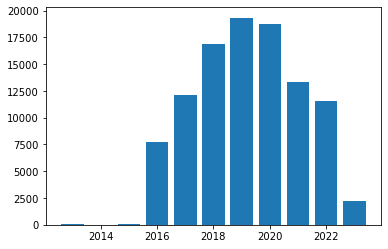

In [19]:
total_count_by_year = df['date'].dt.year.value_counts().sort_index()
plt.bar(x=total_count_by_year.index, height=total_count_by_year.values)
plt.show()

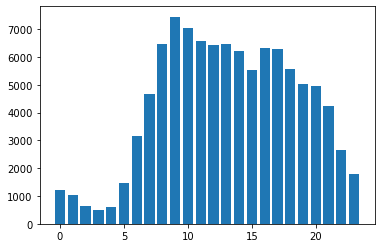

In [20]:
total_count_by_hour = df['date'].dt.hour.value_counts().sort_index()
plt.bar(x=total_count_by_hour.index, height=total_count_by_hour.values)
plt.show()

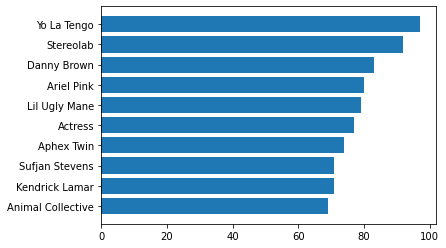

In [21]:
# number of different tracks listened per artist
unique_tracks = df.groupby('artist')['track'].nunique().sort_values(ascending = False)[:10].sort_values()
plt.barh(y=unique_tracks.index, width=unique_tracks.values)
plt.show()

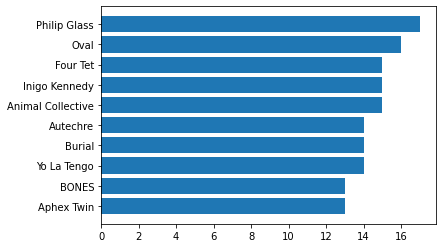

In [22]:
# number of different albums listened per artist
unique_albums = df.groupby('artist')['album'].nunique().sort_values(ascending = False)[:10].sort_values()
plt.barh(y=unique_albums.index, width=unique_albums.values)
plt.show()

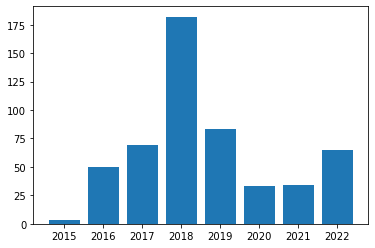

In [23]:
# change the artist name to get yearly graph for an artist
artist_name = 'Animal Collective'
year_count_artist = df.iloc[np.where(df['artist'] == artist_name)]['date'].dt.year.value_counts().sort_index()
plt.bar(x=year_count_artist.index, height=year_count_artist.values)
plt.show()

In [24]:
# Get the names of top artists, top albums, top tracks
N = 10
top_artists = df.groupby('artist')['hour_played'].sum().sort_values(ascending = False)[:N].index
top_albums = df.groupby('album')['hour_played'].sum().sort_values(ascending = False)[:N].index
top_tracks = df.groupby('track')['hour_played'].sum().sort_values(ascending = False)[:N].index

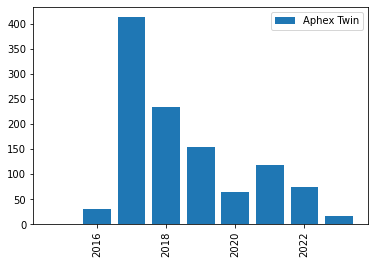

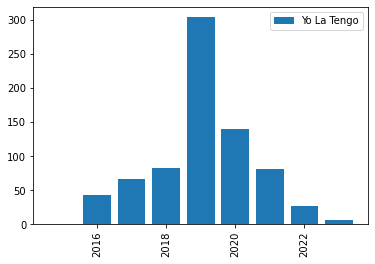

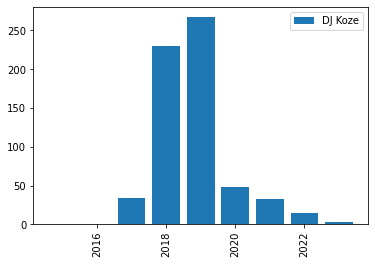

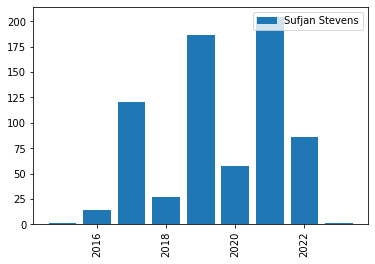

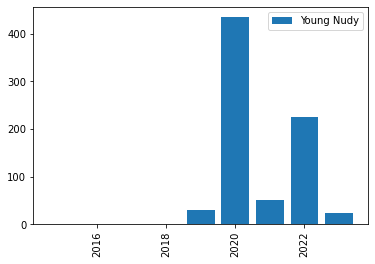

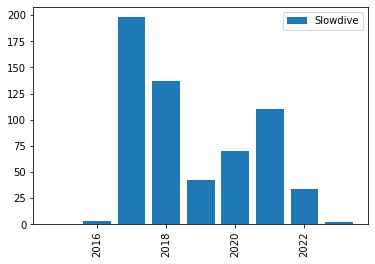

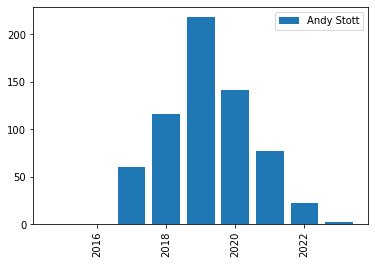

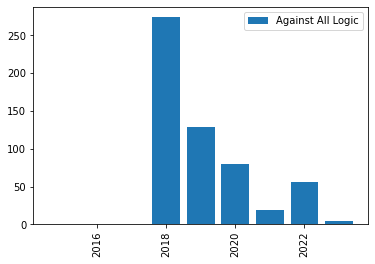

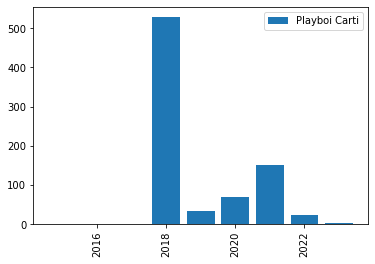

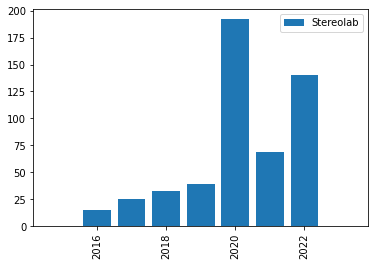

In [25]:
# graph each top artists yearly listening counts
years = range(2015, 2024)

for i in range(N):
    artist_clicks_by_year = df.iloc[np.where(df['artist'] == top_artists[i])]['date'].dt.year.value_counts().reindex(years[::-1], fill_value=0)
    plt.bar(x=artist_clicks_by_year.index, height=artist_clicks_by_year.values)
    plt.legend([top_artists[i]], loc = 'upper right')
    plt.xticks(rotation = 90)
    plt.show()

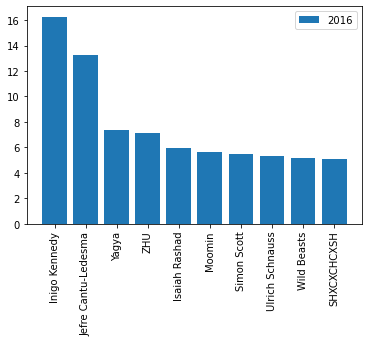

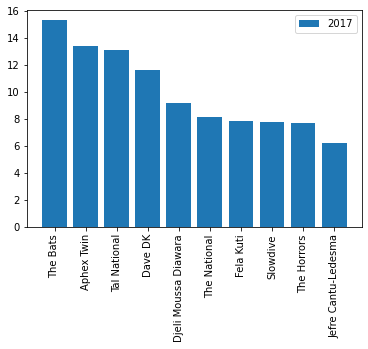

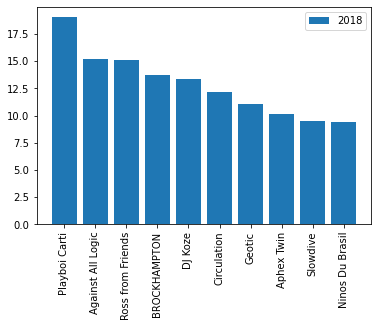

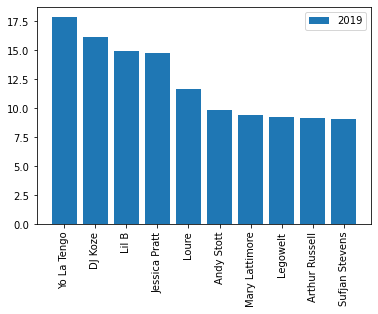

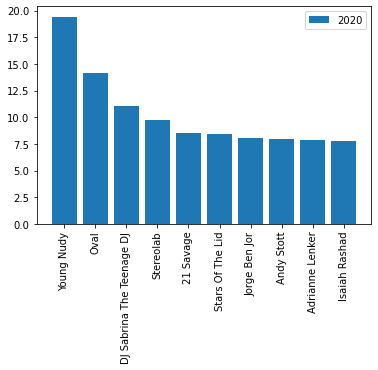

C:\Users\16085\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16085\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16085\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16085\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16085\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\16085\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12487 missing from c

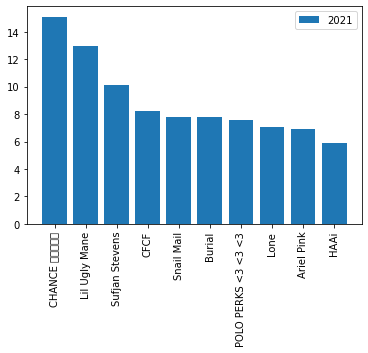

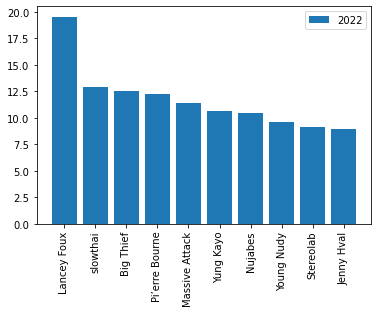

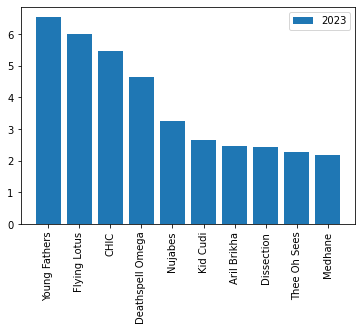

In [26]:
for i in range(2016, 2024):
    top_artists_by_year = df.iloc[np.where(df['date'].dt.year == i)].groupby('artist')['hour_played'].sum().sort_values(ascending = False)[:10]
    plt.bar(x=top_artists_by_year.index, height=top_artists_by_year.values)
    plt.legend([i], loc = 'upper right')
    plt.xticks(rotation = 90)
    plt.show()

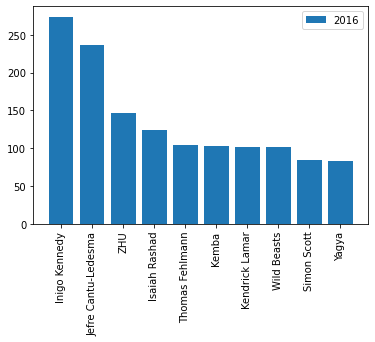

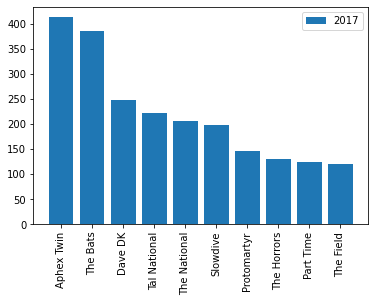

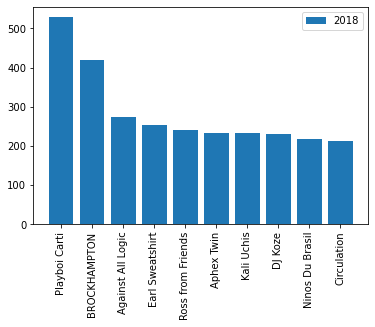

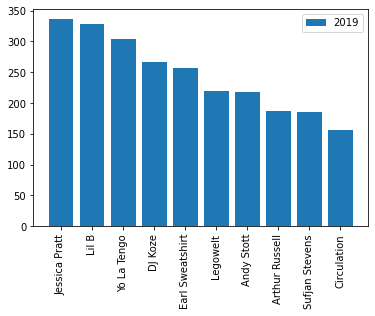

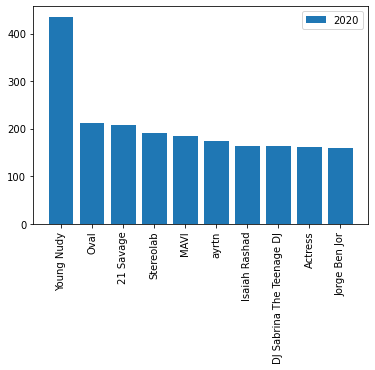

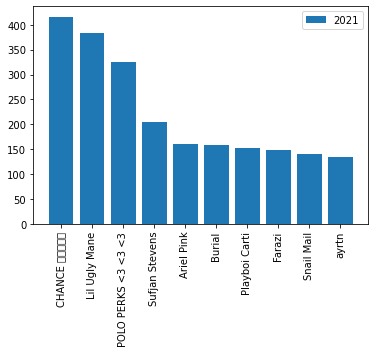

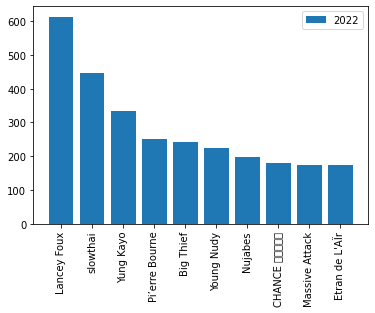

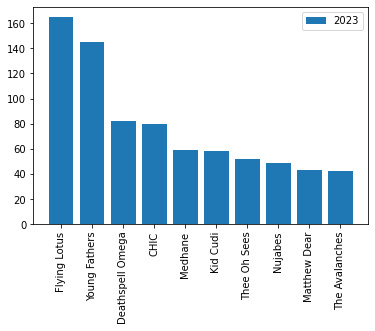

In [27]:
for i in range(2016, 2024):
    artist_count_by_year = df.iloc[np.where(df['date'].dt.year == i)]['artist'].value_counts().sort_values(ascending=False)[:10]
    plt.bar(x=artist_count_by_year.index, height=artist_count_by_year.values)
    plt.legend([i], loc = 'upper right')
    plt.xticks(rotation = 90)
    plt.show()

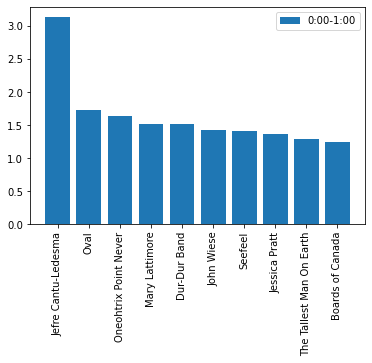

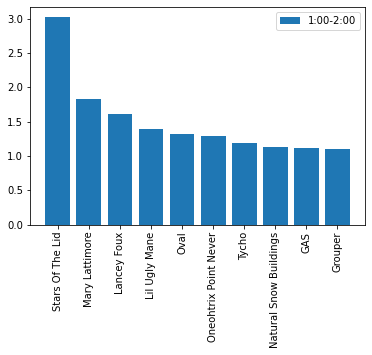

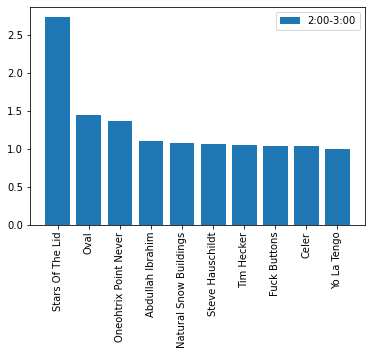

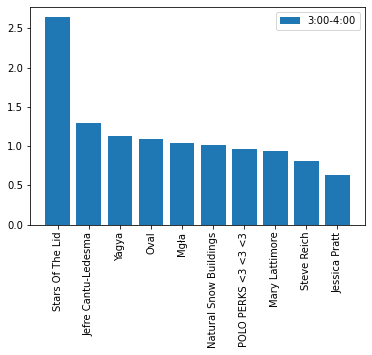

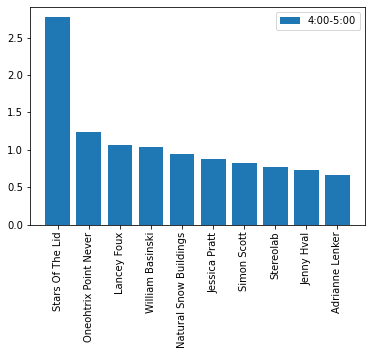

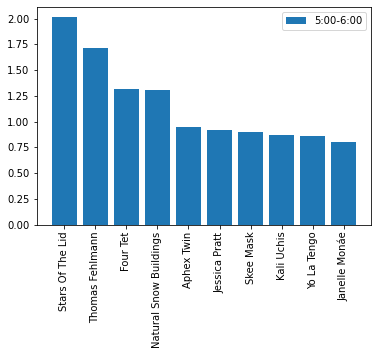

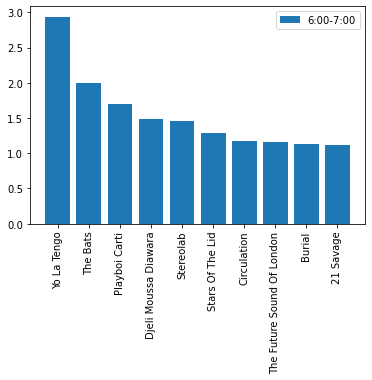

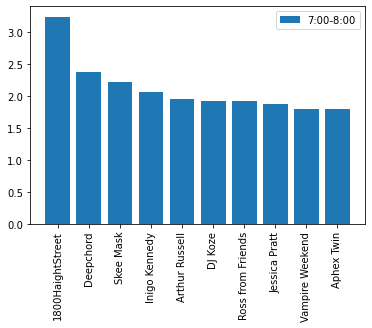

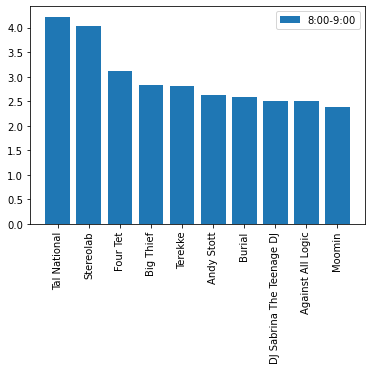

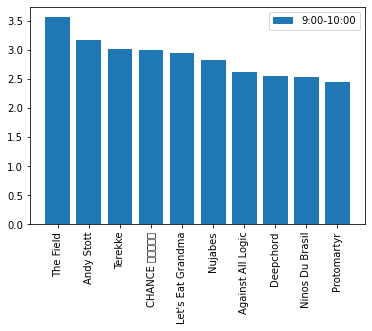

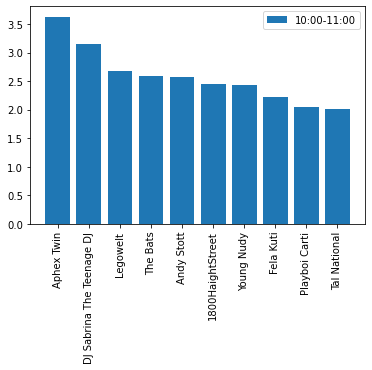

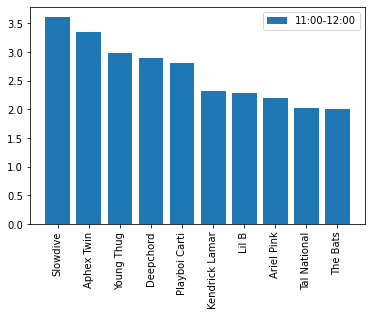

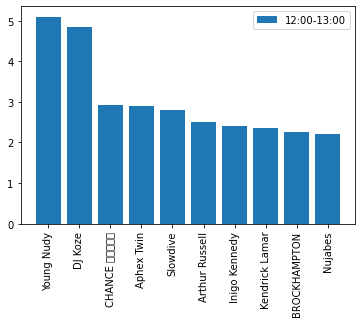

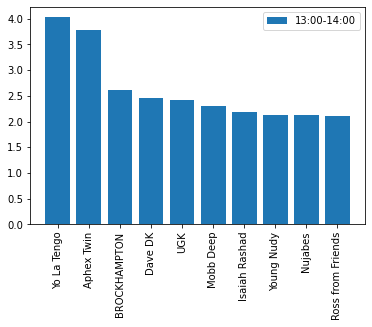

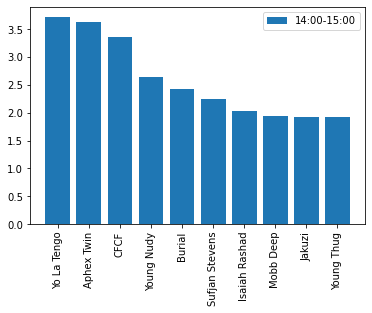

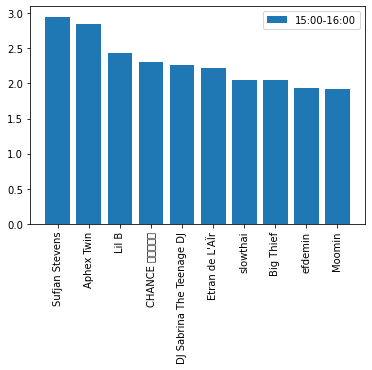

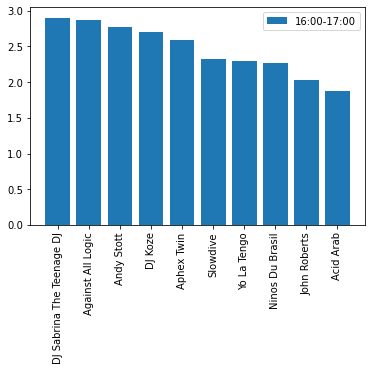

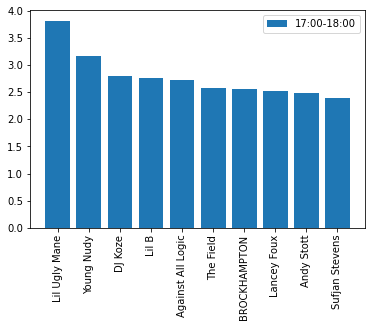

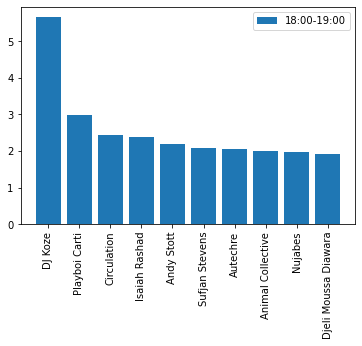

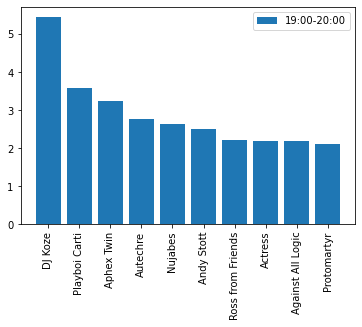

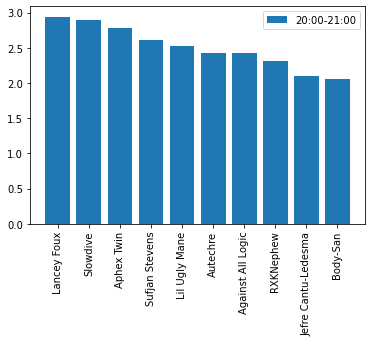

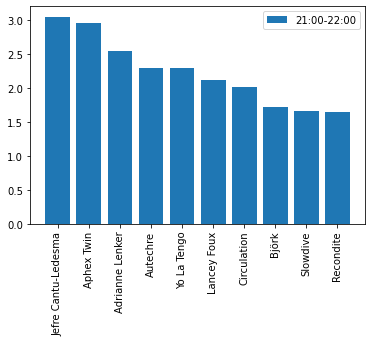

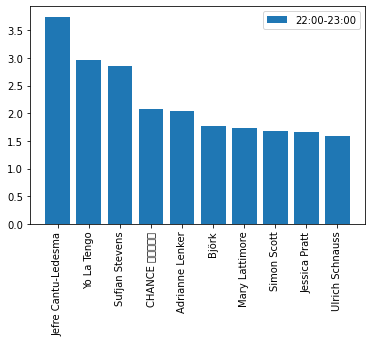

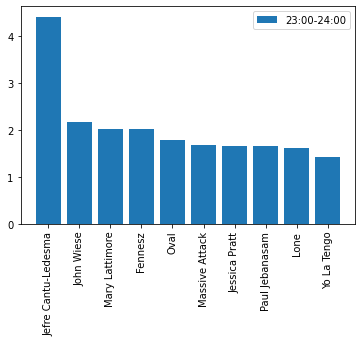

In [29]:
for i in range(0, 24):
    artist_total_by_hour = df.iloc[np.where(df['date'].dt.hour == i)].groupby('artist')['hour_played'].sum().sort_values(ascending = False)[:10]
    plt.bar(x=artist_total_by_hour.index, height=artist_total_by_hour.values)
    plt.legend([str(i) + ':00' + '-' + str(i+1) + ':00'], loc = 'upper right')
    plt.xticks(rotation = 90)
    plt.show()

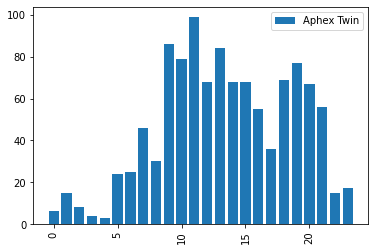

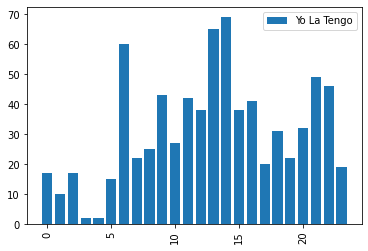

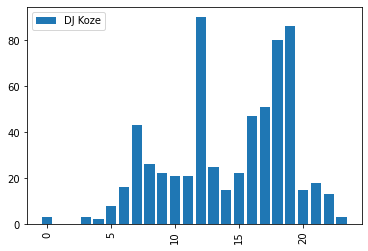

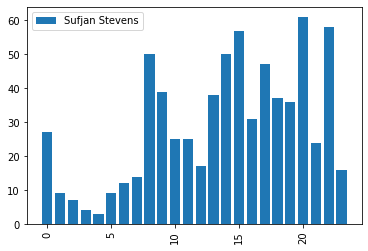

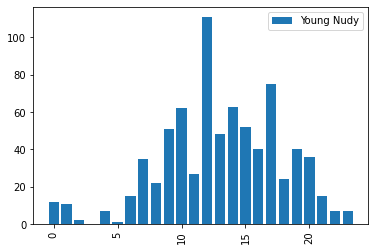

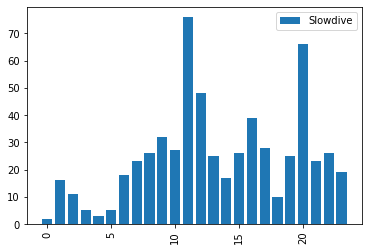

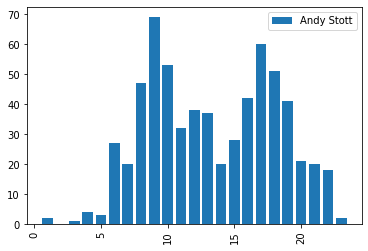

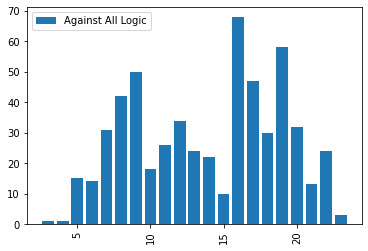

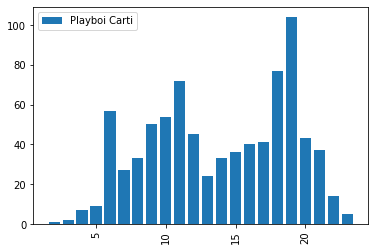

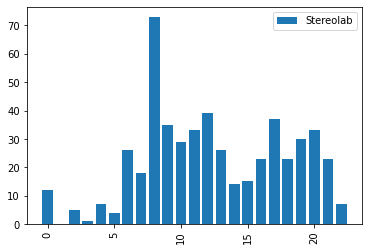

In [30]:
for i in range(N):
    year_count_artist = df.iloc[np.where(df['artist'] == top_artists[i])]['date'].dt.hour.value_counts().sort_index()
    plt.bar(x=year_count_artist.index, height=year_count_artist.values)
    plt.legend([top_artists[i]])
    plt.xticks(rotation = 90)
    plt.show()